Problem 2:

The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

2.3) Comment on the comparison between covariance and the correlation matrix.

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

2.5) Build the covariance matrix, eigenvalues and eigenvector.

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

2.8) Mention the business implication of using the Principal Component Analysis for this case study.



In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
import os
import matplotlib.pyplot as plt
os.chdir("E:\Great learning data science\Advanced statistics\Project")
edu=pd.read_csv("Education+-+Post+12th+Standard.csv")
edu.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [68]:
edu.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [69]:
edu.shape

(777, 18)

In [70]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [126]:
dupes = edu.duplicated()
sum(dupes)

0

In [129]:
edu.isnull().sum()

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [72]:
print("1.Mean\n\n",edu.mean())
print("\n\n")
print("2.Median\n\n",edu.drop("Names",axis=1).median())
print("\n\n")
print("3.Standard deviation\n\n",edu.std())
print("\n\n")
print("4.Range\n\n",edu.drop("Names",axis=1).max()-edu.drop("Names",axis=1).min())

1.Mean

 Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64



2.Median

 Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64



3.Standard deviation

 Apps           3870.201484
Accept         2451.113971
Enroll          9

In [73]:
pd.DataFrame(edu.drop("Names",axis=1).mode()).count()

Apps            3
Accept          1
Enroll          2
Top10perc       1
Top25perc       2
F.Undergrad     7
P.Undergrad     1
Outstate        1
Room.Board      1
Books           1
Personal        1
PhD             1
Terminal        1
S.F.Ratio       1
perc.alumni     1
Expend         33
Grad.Rate       1
dtype: int64

In [74]:
edu.isnull().sum().sum()

0

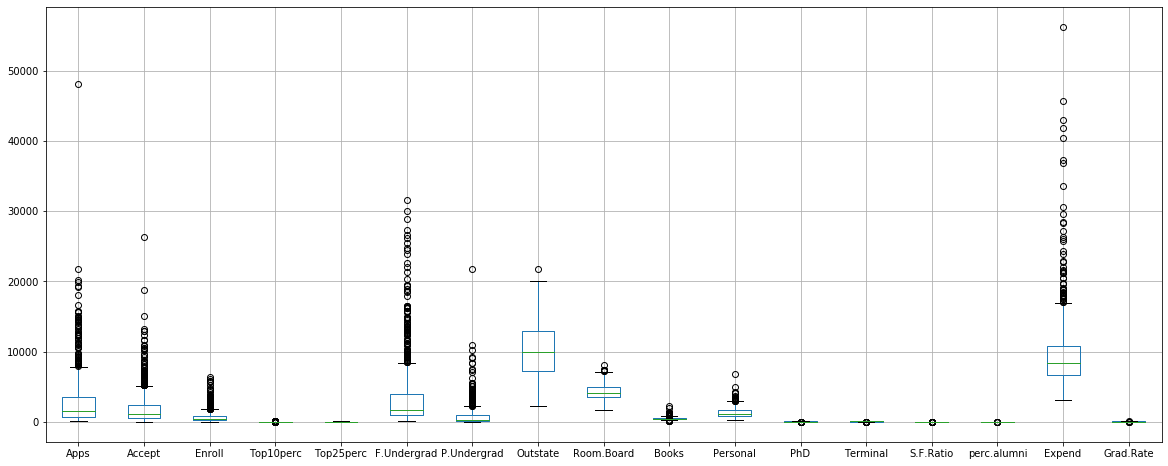

In [75]:
edu.boxplot(figsize=(20,8))

In [76]:
#except top25per all attributes has an outliers

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A91780>,
      dtype=object)

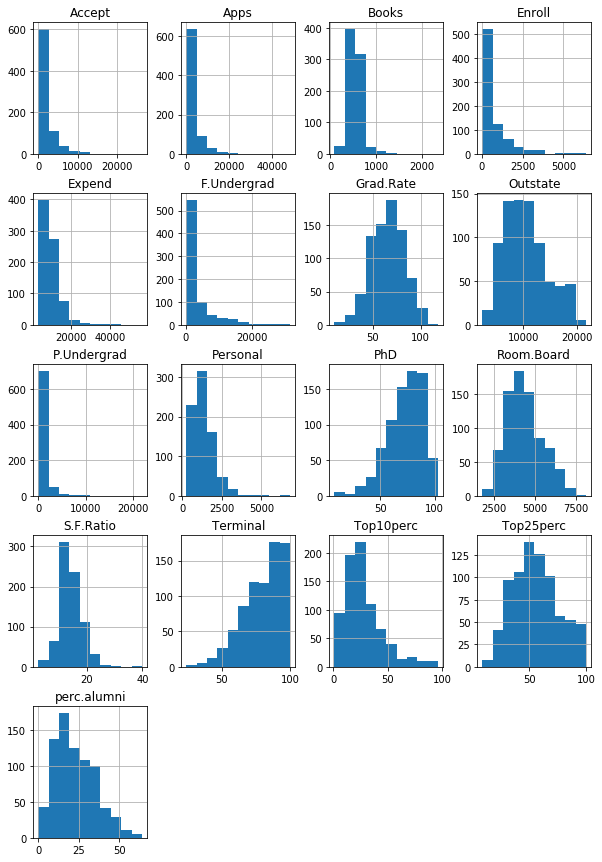

In [78]:
edu.hist(figsize=(10,15))

In [79]:
# Almost variable's distributions are skewed except top25per

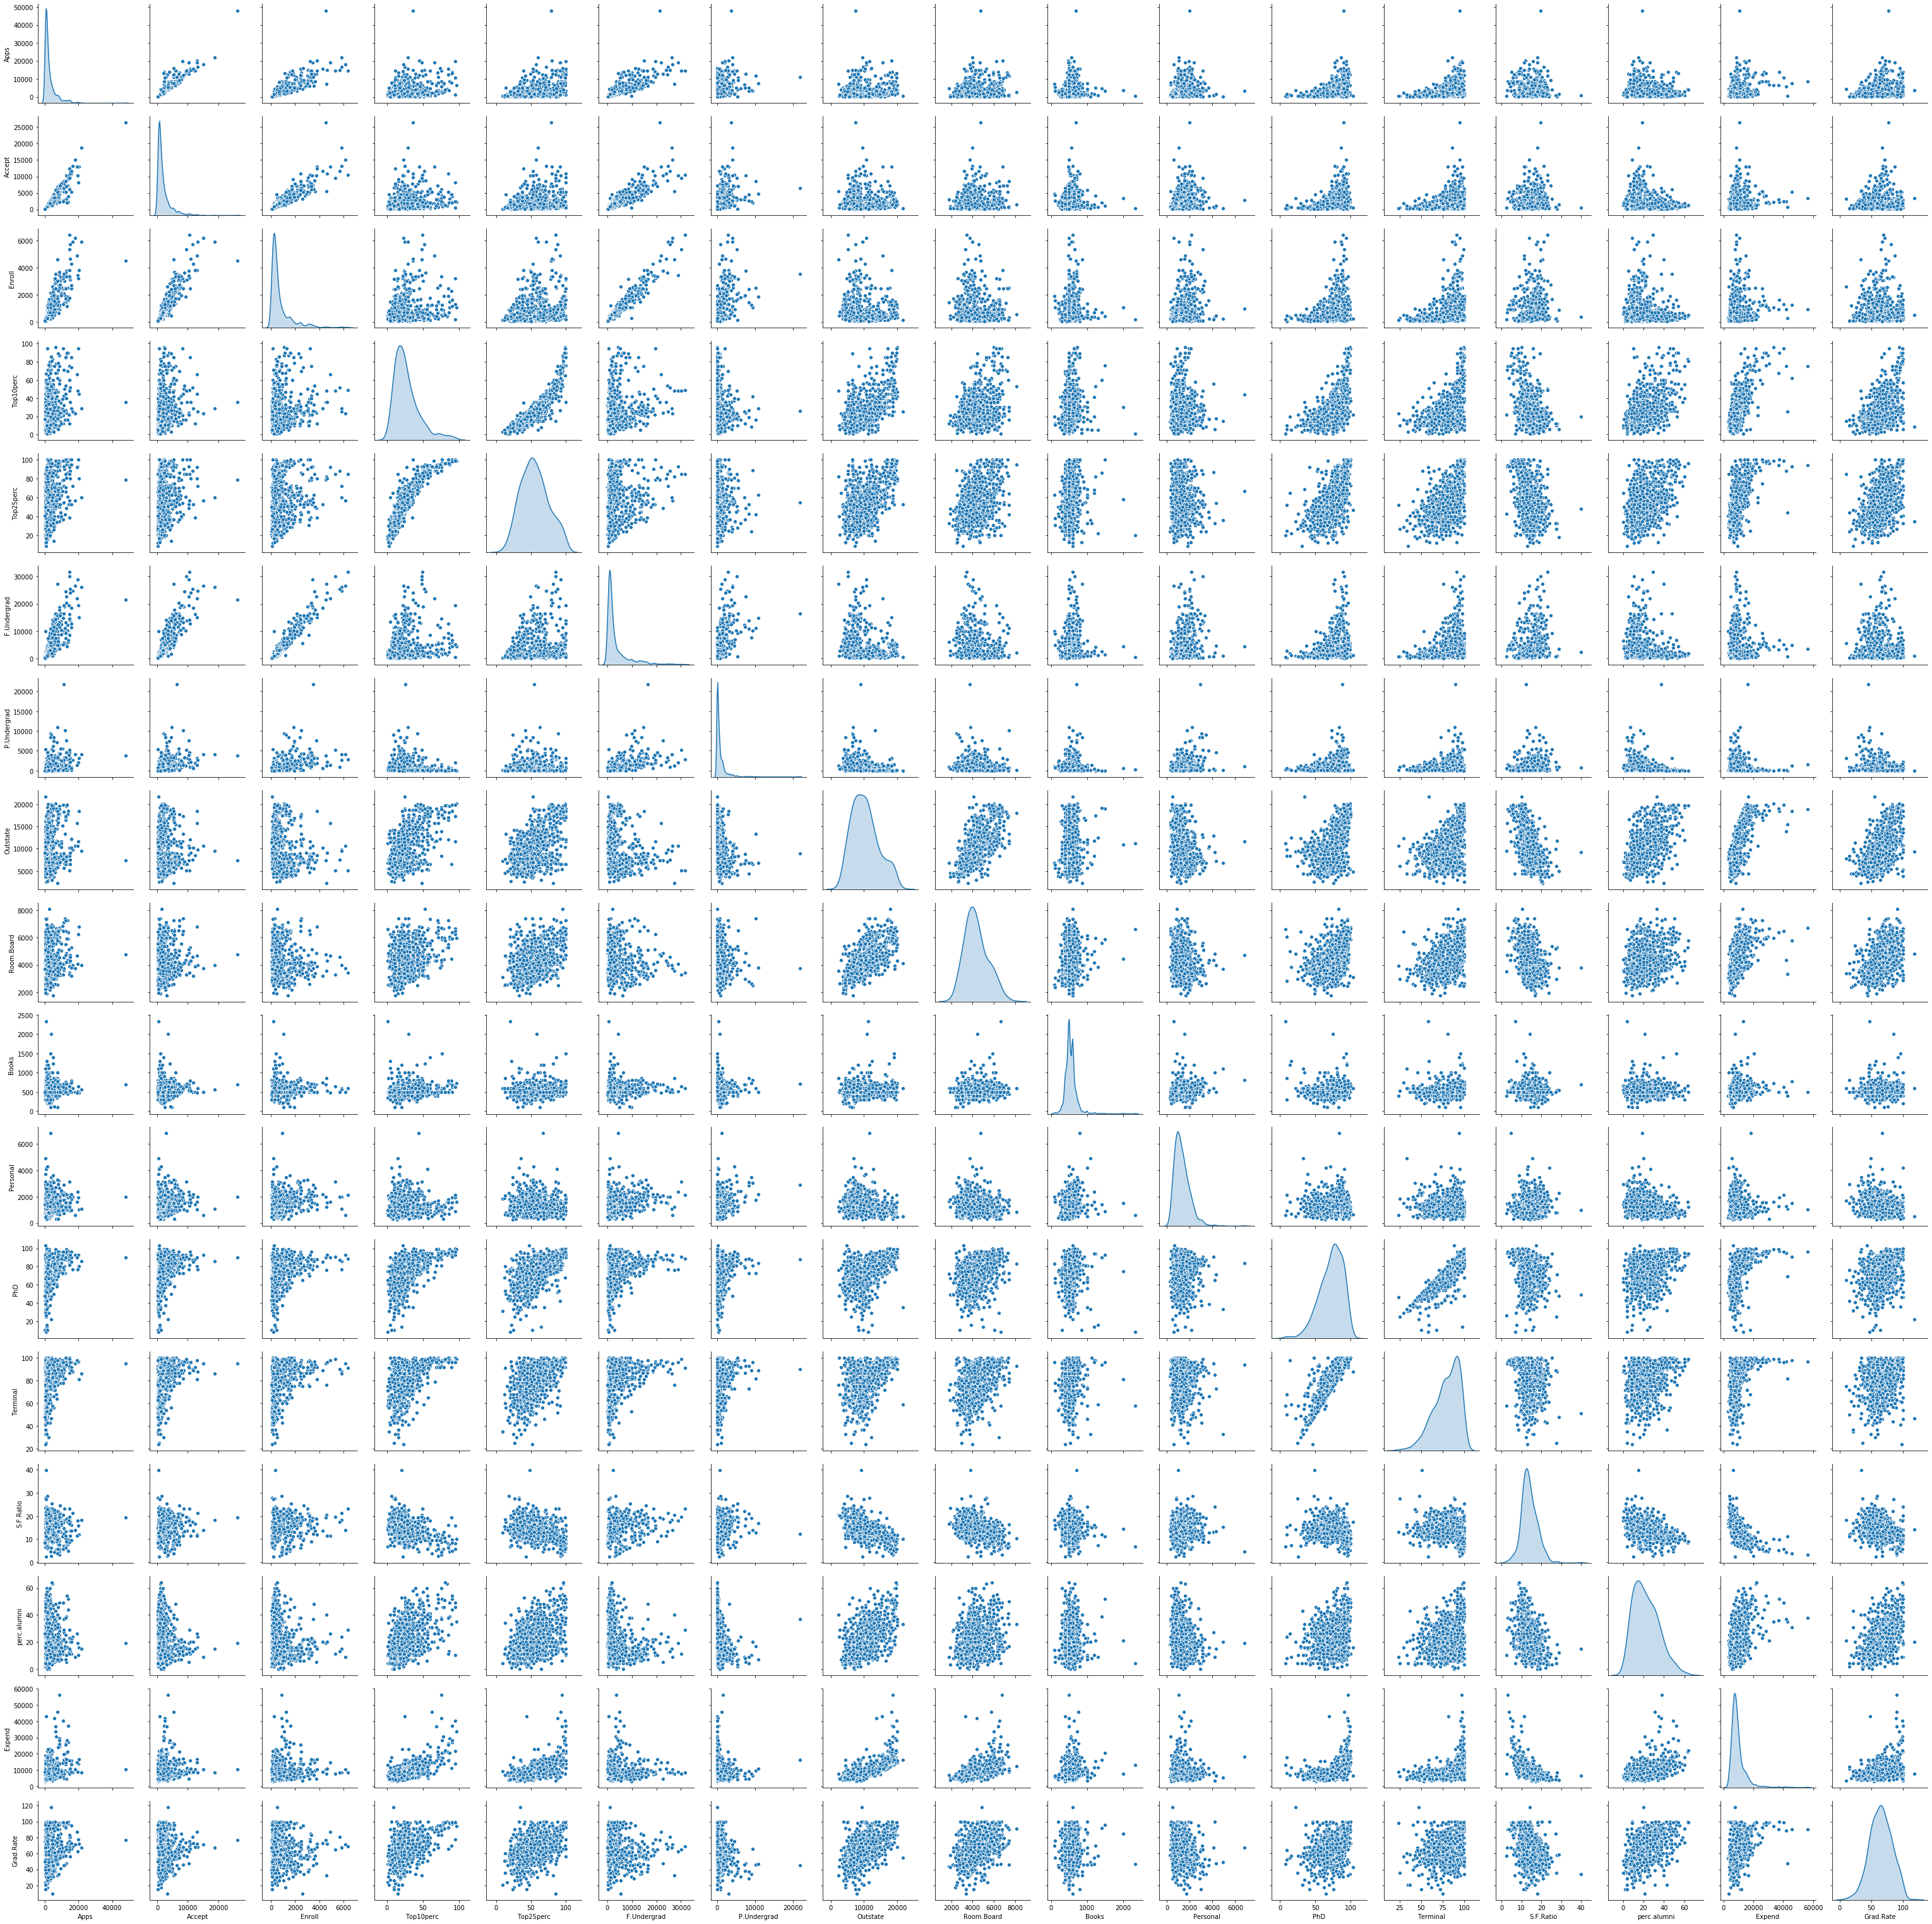

In [80]:
sns.pairplot(edu,diag_kind='kde')

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

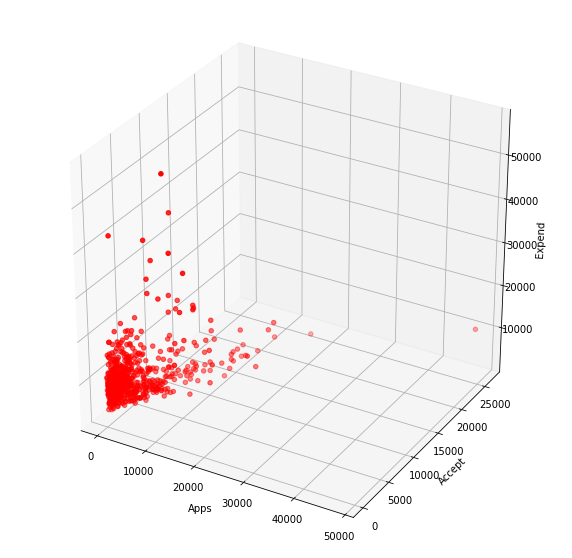

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(edu.Apps, edu.Accept, edu['Expend'], c='r', marker='o')

ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Expend')

plt.show()

In [83]:
edu.corr()[(edu.corr()>0.8)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,NaN,NaN,0.814491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accept,0.943451,1.000000,0.911637,NaN,NaN,0.874223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enroll,0.846822,0.911637,1.000000,NaN,NaN,0.964640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top10perc,NaN,NaN,NaN,1.000000,0.891995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top25perc,NaN,NaN,NaN,0.891995,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.Undergrad,0.814491,0.874223,0.964640,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P.Undergrad,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outstate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room.Board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


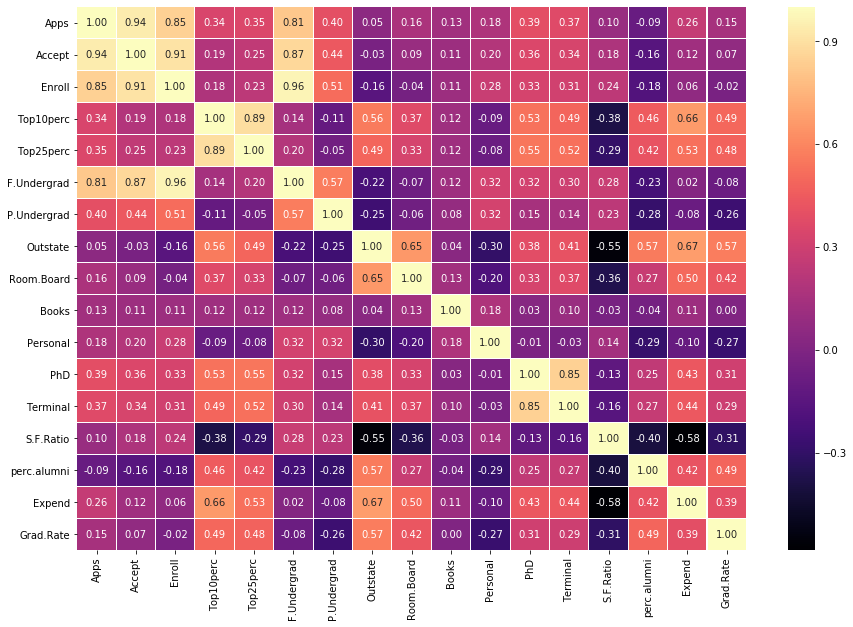

In [84]:
plt.subplots(figsize=(15,10))
sns.heatmap(edu.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
import os
import matplotlib.pyplot as plt
os.chdir("E:\Great learning data science\Advanced statistics\Project")
edun=pd.read_csv("Education+-+Post+12th+Standard.csv")
edun.head()


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [86]:
edu=edun.drop("Names",axis=1)
edu.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [87]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(edu))   # get the z-score of every value with respect to their columns
print(z)

[[3.46881819e-01 3.21205453e-01 6.35089011e-02 ... 8.67574189e-01
  5.01910084e-01 3.18251941e-01]
 [2.10884040e-01 3.87029908e-02 2.88584214e-01 ... 5.44572203e-01
  1.66109850e-01 5.51261842e-01]
 [4.06865631e-01 3.76317928e-01 4.78121319e-01 ... 5.85934748e-01
  1.77289956e-01 6.67766793e-01]
 ...
 [2.33895071e-01 4.23771558e-02 9.15087008e-02 ... 2.21570217e-01
  2.56241250e-01 9.59029170e-01]
 [1.99171118e+00 1.77256262e-01 5.78332661e-01 ... 2.12019418e+00
  5.88797079e+00 1.95359460e+00]
 [3.26765760e-03 6.68715889e-02 9.58163623e-02 ... 4.24433755e-01
  9.87115613e-01 1.95359460e+00]]


In [88]:
threshold = 3
pd.DataFrame(z)[pd.DataFrame(z)>3].count().sum()


158

In [89]:
Q1 = edu.quantile(0.25)
Q3 = edu.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64


In [90]:
edu[(edu < (Q1 - 1.5 * IQR)) | (edu > (Q3 + 1.5 * IQR))].count()

Apps           70
Accept         73
Enroll         79
Top10perc      39
Top25perc       0
F.Undergrad    97
P.Undergrad    67
Outstate        1
Room.Board      7
Books          46
Personal       20
PhD             8
Terminal        8
S.F.Ratio      12
perc.alumni     5
Expend         48
Grad.Rate       4
dtype: int64

In [91]:
edu1 = edu[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
edu1.shape, edu.shape

((682, 17), (777, 17))

In [92]:
edu2 = edu.copy()
for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):
    edu2.iloc[i,j] = edu.iloc[:,j].median()

In [93]:
z = np.abs(stats.zscore(edu2))
pd.DataFrame(z)[pd.DataFrame(z)>3].count().sum()

163

In [94]:
edu4 = edu.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(edu4 < Q1 - 1.5 * IQR)[0], np.where(edu4 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    edu4.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(edu4 > Q3 + 1.5 * IQR)[0], np.where(edu4 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    edu4.iloc[i,j] = whisker[j]
    

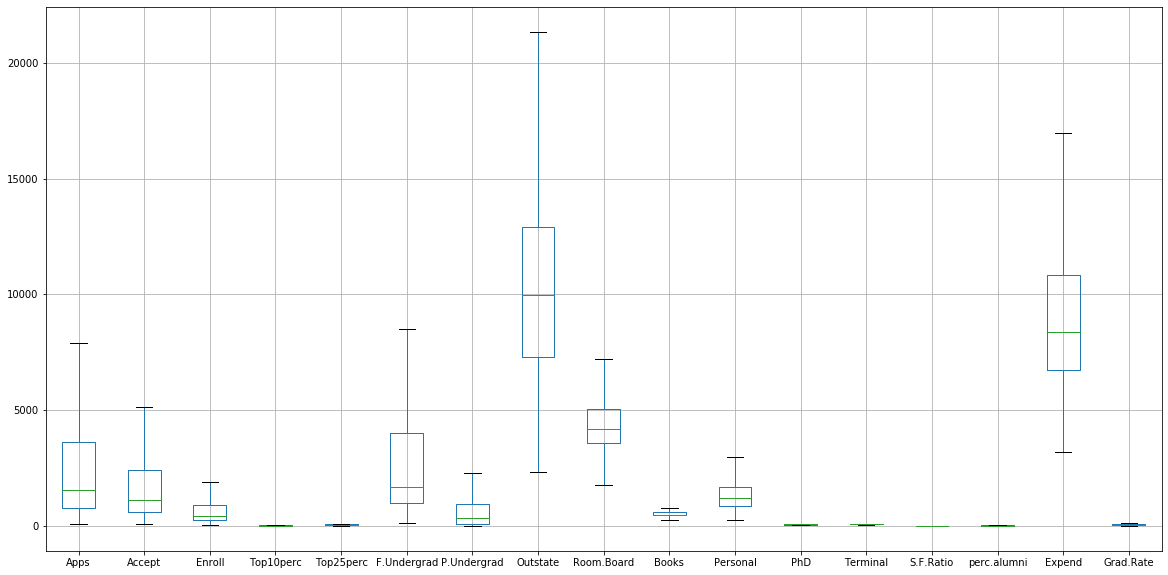

In [95]:
edu4.boxplot(figsize=(20,10))

In [96]:
edu4.shape, edu.shape

((777, 17), (777, 17))

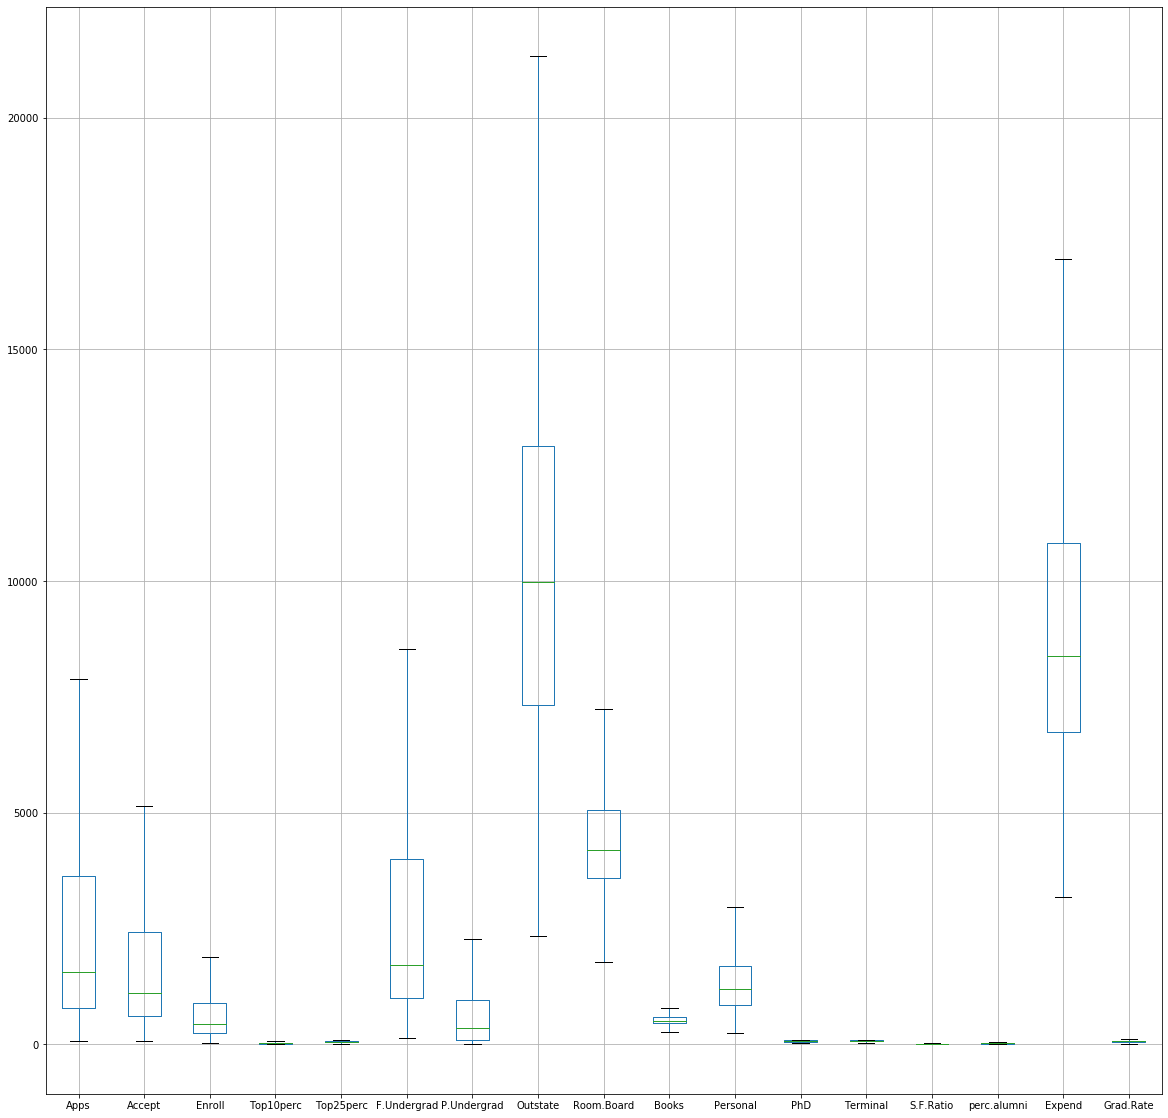

In [97]:
edu_pca4=edu4
edu_pca4.boxplot(figsize=(20,20))

In [98]:
edu_pca_out = edu_pca4[~((edu_pca4 < (Q1 - 1.5 * IQR)) |(edu_pca4 > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
edu_pca_out.shape

(777, 17)

In [99]:
edu_pca4

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.5
5,587.0,479.0,158.0,38.0,62,678.0,41.0,13500.0,3335.0,500.0,675.0,67.0,73.0,9.4,11.0,9727.0,55.0
6,353.0,340.0,103.0,17.0,45,416.0,230.0,13290.0,5720.0,500.0,1500.0,90.0,93.0,11.5,26.0,8861.0,63.0
7,1899.0,1720.0,489.0,37.0,68,1594.0,32.0,13868.0,4826.0,450.0,850.0,89.0,100.0,13.7,37.0,11487.0,73.0
8,1038.0,839.0,227.0,30.0,63,973.0,306.0,15595.0,4400.0,300.0,500.0,79.0,84.0,11.3,23.0,11644.0,80.0
9,582.0,498.0,172.0,21.0,44,799.0,78.0,10468.0,3380.0,660.0,1800.0,40.0,41.0,11.5,15.0,8991.0,52.0


In [100]:
np.where((edu_pca4 < (Q1 - 1.5 * IQR)) | (edu_pca4 > (Q3 + 1.5 * IQR)))

(array([], dtype=int64), array([], dtype=int64))

In [101]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
std_scale.fit_transform(edu_pca4)

array([[-0.37649304, -0.33782994,  0.10638048, ..., -0.8704662 ,
        -0.63091584, -0.31920542],
       [-0.15919478,  0.11674356, -0.26044074, ..., -0.5457262 ,
         0.39609708, -0.5526934 ],
       [-0.47233562, -0.42651118, -0.56934282, ...,  0.5908638 ,
        -0.1318453 , -0.66943739],
       ...,
       [-0.19596198,  0.11083148,  0.06074722, ..., -0.2209862 ,
        -0.25322491, -0.96129736],
       [ 2.19968932,  0.46424267,  1.15243525, ...,  2.1333788 ,
         2.28793972,  1.9573024 ],
       [ 0.1725362 ,  0.07141759,  0.05372672, ...,  0.4284938 ,
        -1.37687014,  1.9573024 ]])

In [103]:
edu_pca5=pd.DataFrame(std_scale.fit_transform(edu_pca4))

In [104]:
edu_pca5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759
5,-0.819765,-0.832474,-0.881755,0.716456,0.313426,-0.836632,-0.859001,0.761311,-0.936213,-0.342372,-1.065138,-0.362217,-0.468931,-1.229904,-0.951651,0.160409,-0.611065
6,-0.916434,-0.923783,-0.978287,-0.632075,-0.545505,-0.933723,-0.594966,0.709061,1.251933,-0.342372,0.289289,1.080436,0.913837,-0.674610,0.266124,-0.094724,-0.144089
7,-0.277759,-0.017264,-0.300809,0.652240,0.616579,-0.497184,-0.871574,0.852873,0.431722,-0.776567,-0.777836,1.017712,1.397806,-0.092872,1.159159,0.678923,0.439631
8,-0.633450,-0.595991,-0.760651,0.202730,0.363952,-0.727312,-0.488793,1.282569,0.040884,-2.079153,-1.352441,0.390471,0.291591,-0.727495,0.022569,0.725177,0.848234
9,-0.821831,-0.819993,-0.857183,-0.375212,-0.596031,-0.791792,-0.807312,0.006918,-0.894927,1.047053,0.781808,-2.055766,-2.681360,-0.674610,-0.626911,-0.056425,-0.786181


In [105]:
from scipy.stats import zscore
edu_pca4=edu_pca4.apply(zscore)
edu_pca4.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


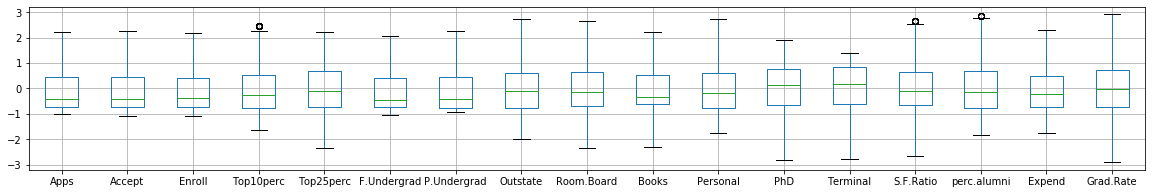

In [106]:
edu_pca4.boxplot(figsize=(20,3))

In [107]:
cov_matrix = np.cov(edu_pca4.T)
#print('Covariance Matrix \n%s', cov_matrix)
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
1,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
2,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
3,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
4,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
5,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
6,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
7,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
8,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
9,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


In [108]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)
pd.DataFrame()

Eigen Vectors 
%s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272e-01 -3.53988202e-02 -6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02 -7.88293849e-02  3.69115031e-01
  -1.57211016e-01 -8.88656824e-02 -2.57455284e-01  2.89538833e-01
 

""


In [109]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


In [110]:
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[33.26608366671336,
 28.755345008170774,
 6.617163554717709,
 5.898143957623823,
 5.123892672339139,
 4.498638671547009,
 3.4362426556658137,
 3.198847173205204,
 2.4881075492912657,
 2.238396454242057,
 1.4511567777537842,
 0.8651434488112959,
 0.7892466165436466,
 0.5806273152471961,
 0.43878768621189934,
 0.22261871681452408,
 0.1315580751014857]

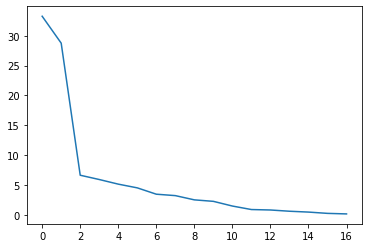

In [111]:
plt.plot(var_exp)

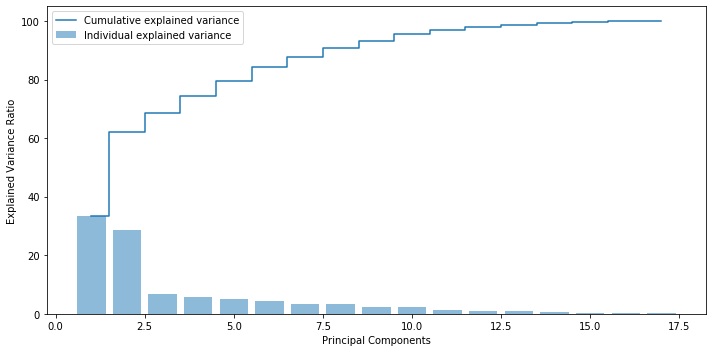

In [112]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=13)
data_reduced = pca.fit_transform(edu_pca4)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004476,  2.12212752, -0.50151255, ...,  0.32216034,
         1.32596561, -1.42543835],
       ...,
       [ 0.30643518,  0.17281667,  0.07444668, ..., -0.69572349,
        -0.45128505, -0.19028373],
       [ 0.19180598,  0.25723329, -0.21653416, ...,  0.172667  ,
        -0.05745397,  0.25604823],
       [ 0.19435855, -0.16407435,  0.17371276, ...,  0.01798502,
        -0.24818241, -0.26726005]])

In [115]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [116]:
df_comp = pd.DataFrame(pca.components_,columns=list(edu_pca4))
df_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843
5,0.002188,-0.016521,-0.068079,-0.088866,-0.027627,-0.051647,-0.024538,-0.020386,0.237267,0.638605,-0.381496,0.003344,0.035412,0.468753,0.012567,-0.231562,0.313556
6,-0.028372,-0.012958,-0.015240,-0.257455,-0.239039,-0.031175,-0.010014,0.094537,0.094521,-0.111193,0.639418,0.089232,0.091699,0.152865,0.391401,-0.150501,0.468642
7,-0.089950,-0.137606,-0.144217,0.289539,0.345644,-0.108749,0.123842,0.011272,0.389639,-0.239817,0.277207,-0.034263,-0.090308,0.242808,-0.566073,-0.118824,0.180459
8,-0.130567,-0.142276,-0.050871,0.122468,0.193936,-0.001455,0.634774,0.008366,0.220527,-0.021025,-0.017372,-0.166510,-0.112609,0.153685,0.539236,-0.024237,-0.315813
9,-0.156464,-0.149210,-0.064900,-0.035878,0.006418,-0.000164,0.546346,-0.231800,-0.255108,0.091162,-0.127648,0.100975,0.086036,-0.470528,-0.147629,-0.080415,0.488415


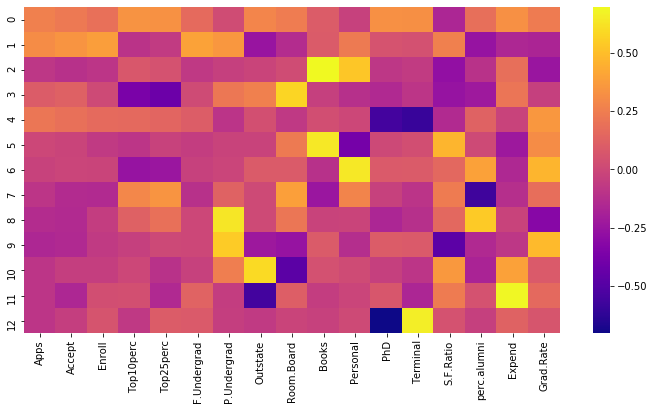

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

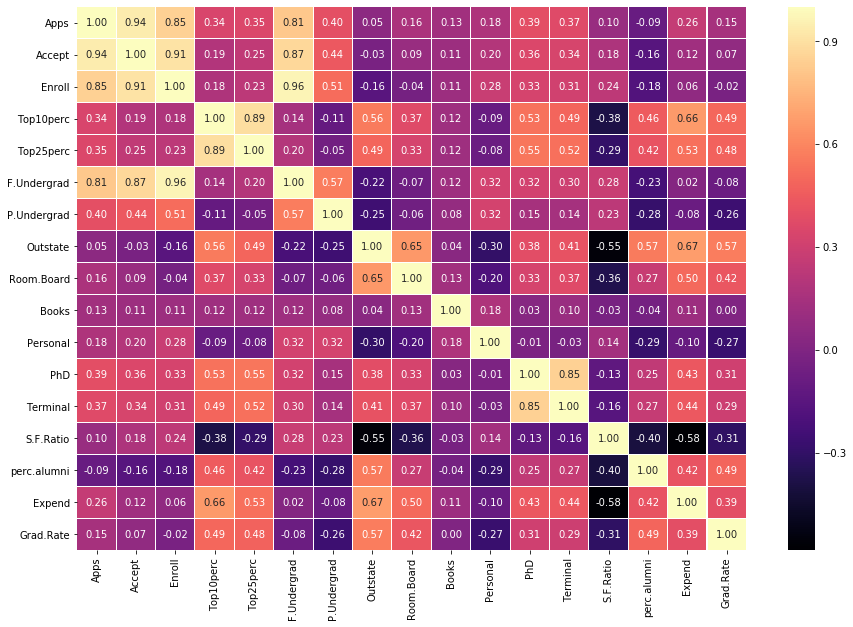

In [118]:
plt.subplots(figsize=(15,10))
sns.heatmap(edu.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

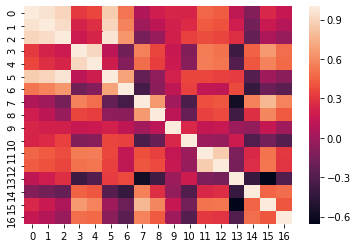

In [119]:
sns.heatmap(pd.DataFrame(cov_matrix))

In [120]:
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
1,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
2,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
3,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
4,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
5,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
6,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
7,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
8,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
9,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


In [121]:
edu.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [122]:
pd.DataFrame(eig_vals)

,0
0,5.662522
1,4.894708
2,1.126367
3,1.003977
4,0.872184
5,0.765754
6,0.584914
7,0.544505
8,0.423523
9,0.381018


In [123]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.262172,0.314136,0.081018,-0.098776,-0.219898,0.002188,-0.028372,-0.089950,0.130567,-0.156464,-0.086213,0.182170,-0.599138,0.089978,0.088870,0.549428,0.005415
1,-0.230562,0.344624,0.107659,-0.118140,-0.189635,-0.016521,-0.012958,-0.137606,0.142276,-0.149210,-0.042590,-0.391042,0.661497,0.158862,0.043795,0.291572,0.014458
2,-0.189276,0.382813,0.085530,-0.009307,-0.162315,-0.068079,-0.015240,-0.144217,0.050871,-0.064900,-0.043841,0.716685,0.233235,-0.035399,-0.061924,-0.417001,-0.049791
3,-0.338875,-0.099319,-0.078829,0.369115,-0.157211,-0.088866,-0.257455,0.289539,-0.122468,-0.035878,0.001778,-0.056205,0.022145,-0.039228,0.069960,0.008798,-0.723645
4,-0.334691,-0.059506,-0.050794,0.416824,-0.144449,-0.027627,-0.239039,0.345644,-0.193936,0.006418,-0.102127,0.019674,0.032265,0.145622,-0.097028,-0.010778,0.655465
5,-0.163293,0.398636,0.073708,-0.013950,-0.102728,-0.051647,-0.031175,-0.108749,0.001455,-0.000164,-0.034999,-0.542775,-0.367681,-0.133556,-0.087175,-0.570684,0.025306
6,-0.022480,0.357550,0.040357,-0.225351,0.095679,-0.024538,-0.010014,0.123842,-0.634774,0.546346,0.252107,0.029503,0.026249,0.050249,0.044554,0.146321,-0.039715
7,-0.283547,-0.251864,0.014939,-0.262975,-0.037275,-0.020386,0.094537,0.011272,-0.008366,-0.231800,0.593433,0.001034,-0.081425,0.560393,0.067241,-0.211561,-0.001593
8,-0.244187,-0.131909,-0.021138,-0.580894,0.069108,0.237267,0.094521,0.389639,-0.220527,-0.255108,-0.475297,0.009857,0.026778,-0.107366,0.017772,-0.100935,-0.028258
9,-0.096708,0.093974,-0.697121,0.036156,-0.035406,0.638605,-0.111193,-0.239817,0.021025,0.091162,0.043570,0.004361,0.010462,0.051622,0.035434,-0.028638,-0.008063


In [124]:
np.format_float_scientific(([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01]]))

TypeError: must be real number, not list

In [ ]:
np.format_float_scientific(np.array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01]]))